## Loan Data Analysis and Exploration

In this project, I will analyze loan data obtained from Prosper (More information about below) and endeavour to asnwer the following questions with the outcome of my analysis.

> What factors affect a loan’s outcome status?
> What affects the borrower’s APR or interest rate?
> Are there differences between loans depending on how large the original loan amount was?

<a id='contents_table'></a>

## Table of Contents
- [Introduction](#intro)
- [Part I - Preliminary Wrangling](#preliminary_wrangling)
- [Part II - Univariate](#Univariate)
- [Part III - Bivariate](#Bivariate)
- [Part IV - Multivariate](#regression)


<a id='intro'></a>

### Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data dictionary explains the variables in the data set. You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

### About Us on Company Website

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $17 billion in loans to more than 1,010,000 people.

Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between $2,000 and $40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

Prosper Marketplace is backed by leading investors including Sequoia Capital, Francisco Partners, Institutional Venture Partners, and Credit Suisse NEXT Fund.

[Back to Table of Contents](#contents_table)

<a id='preliminary_wrangling'></a>
## 1. Loan Data Wrangling

The first part of this project is the preliminary wrangling and it consists of the follwoing 3 steps - Gatherring, Assessing and Cleaning.

### 1.1 Gathering

In this step, I'll be gathering required data bymanually downloading datasets from the source. Thankfully, we were provided a link by Udacity for this purpose.


[Back to Table of Contents](#contents_table)

In [24]:
# importing all dependencies and configuring inline plots with matplotlib

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [49]:
# loading downloaded data into dataframe

loans = pd.read_csv('prosperLoanData.csv')

### 1.2 Assessing

In this step, I'll be programmatically assessing data. Here, I'll clearly define the following aspects of our dataset:

- Noteworthy details about our dataset
- Goals for analyzing this dataset
- Quality issues with our data

[Back to Table of Contents](#contents_table)

In [48]:
# viewing the first 5 rows of our data helps to see what we are dealing with.
# also viewing number of rows and columns present.

print ('The number of rows and columns is', loans.shape)
loans.head()

The number of rows and columns is (113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [47]:
# viewing additional information about our dataset 
# helps us to assess it effectively

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### 1.2.1 Noteworthy Details For This Dataset

There are 113937 records/rows along with 81 variables/columns in this dataset. Each of the 81 variables are clearly listed in the section above. They include the following 10 categorical variables which i find to be most helpful in achieving the outcome of this analysis.

1. 'Term' ---- length of the loan in months [numerical/discrete]
2. 'BorrowerRate' ---- interest rate of the loan [numerical/continuous]
3. 'ListingCategory' ---- category of the loan [categorical/nominal]
4. 'IsBorrowerHomeowner' ---- whether the borrower is a homeowner or not [categorical/ordinal]
5. 'IncomeVerifiable' ---- Whether the borrower stated that he could show an income documentation [categorical/ordinal]
6. 'Recommendations' ---- the number of recommendations for the borrower [numerical/discrete]


### 1.2.2 Goals For Analyzing This Dataset

The goal of this analysis is to uncover the loan variables that are most impactful to the "Borrowers Rate". Using the varfew iables highlighted above, I belive we will be able to achieve this.


### 1.2.3 Quality Issues WIth Our dataset?

1. Space in the column name 'ListingCategory (numeric)'

2. 'ListingCategory': data type needs to be changed from numeric data to categorical data.

[Back to Table of Contents](#contents_table)

In [68]:
# creating a dataframe with the abovementioned 6 variables

loans_mark2 = loans[['Term', 'BorrowerRate', 'ListingCategory (numeric)', 'IsBorrowerHomeowner',
                   'IncomeVerifiable', 'Recommendations', 'LoanOriginalAmount']].copy()

### 1.3 Cleaning

In this step I'll be addressing the data quality issues in our dataset. For each issue we'll be adopting three key steps to clean our data:

- Define - here, I'll define the problem
- Code - here, I'll write and execute the code to solve the problem
- Test - here, I'll test to see if the code has given the desired results

Let's get started!

In [69]:
# first, we create a copy of our dataframe 
    # this is prevents us from making irreversable changes to our dataset
# next, we perform data cleaning on this newly created dataframe

loans_clean = loans_mark2.copy()

### 1.3.1 Solving Issue 1: Space in the column name 'ListingCategory (numeric)'

#### Define 
Use pandas rename() function to remove the 'numeric' in the column name

#### Code

In [70]:
# removing space from column name using the panda rename function

loans_clean.rename(columns = {'ListingCategory (numeric)' : 'listingcategory'}, inplace =True)

In [71]:
# I prefer that all column names begin with small letters
# therefore, I'll change the remaining column names using the following code

loans_clean.rename(columns = {'Term':'term', 'BorrowerRate':'borrowrate','IsBorrowerHomeowner':'isborrowerhomeowner',
                   'IncomeVerifiable':'incomeverifiable', 'Recommendations':'recommendation'}, inplace = True);

#### Test

In [72]:
# testing whether column name has been modified like we wanted

loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
term                   113937 non-null int64
borrowrate             113937 non-null float64
listingcategory        113937 non-null int64
isborrowerhomeowner    113937 non-null bool
incomeverifiable       113937 non-null bool
recommendation         113937 non-null int64
LoanOriginalAmount     113937 non-null int64
dtypes: bool(2), float64(1), int64(4)
memory usage: 4.6 MB


In [73]:
# I realised from the loans_clean.info() above that the "LoanOriginalAmount" column sill exists in our Dataframe
# I will remove this column using the following code

loans_clean.drop(columns = ['LoanOriginalAmount'], inplace=True)

In [74]:
# testing whether column has been removed like we wanted

loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
term                   113937 non-null int64
borrowrate             113937 non-null float64
listingcategory        113937 non-null int64
isborrowerhomeowner    113937 non-null bool
incomeverifiable       113937 non-null bool
recommendation         113937 non-null int64
dtypes: bool(2), float64(1), int64(3)
memory usage: 3.7 MB


### 1.3.2  Solving Issue 2: changing "listingcategory" data type to category

#### Define 
Use pandas astype() function to change the data format of the columns.

#### Code

In [88]:
# changing this column to a category data type

loans_clean['listingcategory'] = \
loans_clean['listingcategory'].astype('category', inplace=True)

#### Test

In [90]:
# checking to see if the code worked

print(loans_clean.info())

print (' ')

loans_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
term                   113937 non-null int64
borrowrate             113937 non-null float64
listingcategory        113937 non-null category
isborrowerhomeowner    113937 non-null bool
incomeverifiable       113937 non-null bool
recommendation         113937 non-null int64
dtypes: bool(2), category(1), float64(1), int64(2)
memory usage: 2.9 MB
None
 


,term,borrowrate,listingcategory,isborrowerhomeowner,incomeverifiable,recommendation
0,36,0.1580,0,True,True,0
1,36,0.0920,2,False,True,0
2,36,0.2750,0,False,True,0
3,36,0.0974,16,True,True,0
4,36,0.2085,2,True,True,0


In [91]:
# storing the cleaned Dataframe

loans_clean.to_csv('loans_clean.csv', index=False)

<a id='Univariate'></a>

## 2. Univariate Exploration

In this part of the project, we will conduct a univariate exploration for all 10 loan variables


[Back to Table of Contents](#contents_table)


### 2.1 Exploring 'BorrowerRate' Column 

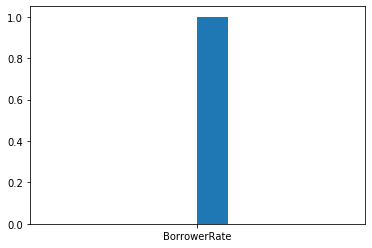

In [94]:
# define the bins

bin_width = 0.025
bin_edges = np.arange(loans_clean['BorrowerRate'].min(), 
                         loans_clean['BorrowerRate'].max() + bin_width,
                         bin_width)

# plot histogram for Borrowerrate

plt.hist(data = loans_clean, x = 'BorrowerRate', bins = bin_edges)
plt.xlabel = ('BorrowerRate')
plt.ylabel = ('Count');


The Borrower Rate variable has a slightly right-skewedn unimodal distribution. The peak of frequency is near 0.15. The bin 0.0-0.025 represent the lowest borrower rates in the dataset and the 0.35-0.375 represent the highest borrower rates in the dataset.

### 2.2 Exploring 'Term'  Column

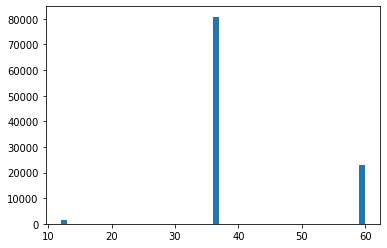

In [42]:
# define the bins
bin_width = 1
bin_edges = np.arange(loans_clean['Term'].min(), 
                      loans_clean['Term'].max() + bin_width, 
                      bin_width)

# plot a histogram for the variable 'Term'
plt.hist(data=loans_clean, x = 'Term', bins = bin_edges)
plt.xlabel = ('Term [month]');

The histogram shows that there are only loans with three different lengths. Hence, an ordered bar chart is a better way to plot this data.

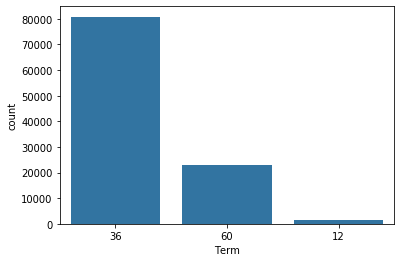

In [43]:
# plot an ordered bar chart for the variable 'Terms'
base_color = sb.color_palette()[0]
order_bars = loans_clean['Term'].value_counts().index
sb.countplot(data=loans_clean, x='Term', color=base_color,
              order=order_bars);


The ordered bar chart by frequency shows that loans issued with a 36 months term have the highest frequency (around 80,000). After this, there are loans with a 60 months term (frequency: approximately 20,000). Loans with a 12 months term have the least frequency (less than 2,500).

### 2.3 Exploring 'ListingCategory' Column

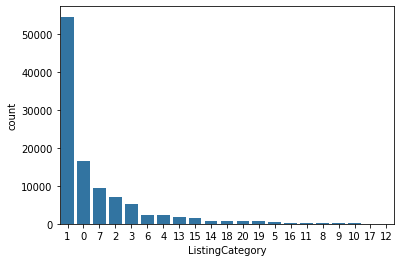

In [44]:
# plot an ordered bar chart for the variable 'ListingCategory'
base_color = sb.color_palette()[0]
order_bars = loans_clean['ListingCategory'].value_counts().index
sb.countplot(data=loans_clean, x='ListingCategory', 
              color=base_color, order=order_bars);


The ordered bar by frequency shows that the frequency reduces dramatically over the first five loan categories. The loan category with the highest frequency is 1 = Debt Consolidation (approximately 55,000). After this comes 0 = Not Available (around 17,500), 7 = Other (slightly less than 10,000), 2 = Home Improvement (approximately 8,000) and 3 = Business (around 6,000). All in all the frequencies of the top 5 loan categories account for around 90 percent of the whole data.

### 2.4 Exploring 'isborrowerhomeowner' Column

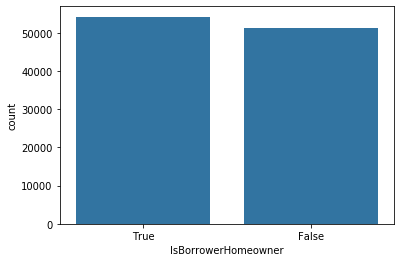

In [45]:
# plot an ordered bar chart for the variable 'IsBorrowerHomeowner'
base_color = sb.color_palette()[0]
order_bars = loans_clean['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data=loans_clean, x='IsBorrowerHomeowner', 
              color=base_color, order=order_bars);


The homeownership is almost fairly distributed in the dataset. There are slightly more loan borrowers who own a home (around 55,000) than borrowers who don't own a home (slightly less than 50,000 ).

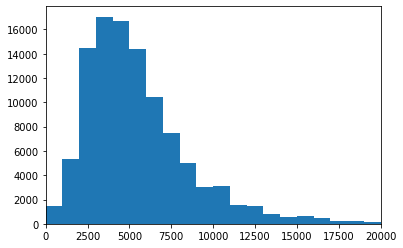

In [49]:
# focusing on the bulk of data < 20,000
bin_width = 1000
bin_edges = \
np.arange(loans_clean['StatedMonthlyIncome'].min(), 20000 + bin_width, 
          bin_width)

plt.hist(data=loans_clean, x = 'StatedMonthlyIncome', 
         bins = bin_edges)
plt.xlim(0, 20000)
plt.xlabel = ('Stated Monthly Income [USD]')
plt.ylabel = ('count');

After focusing on the bulk of data (less than 20,000), you can see a right-skewed unimodal distribution for the stated monthly incomes. The peak of the frequency is near $ 5,000.

### 2.5 Exploring 'IncomeVerifiable' Column

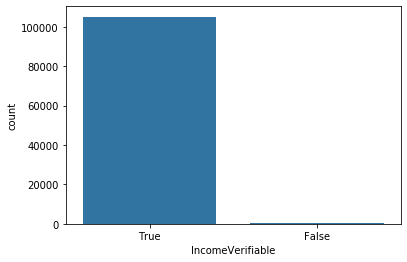

In [50]:
# plot an ordered bar chart for the variable 'IncomeVerifiable'
base_color = sb.color_palette()[0]
order_bars = loans_clean['IncomeVerifiable'].value_counts().index
sb.countplot(data=loans_clean, x='IncomeVerifiable', 
              color=base_color, order=order_bars);


### 2.9 Exploring 'Recommendation' Column

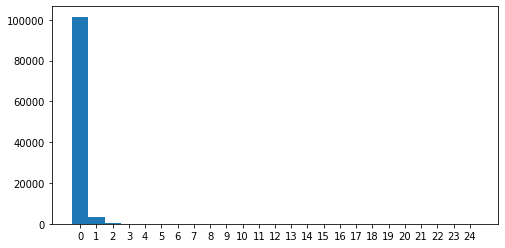

In [61]:

# plot Recommendations via a histogram
plt.figure(figsize=[8, 4])
bin_width = 1
bin_edges = \
np.arange(loans_clean['Recommendations'].min(), 
          loans_clean['Recommendations'].max() + 0.1 + bin_width, 
          bin_width)

plt.hist(data=loans_clean, x = 'Recommendations', 
         bins = bin_edges)
plt.xlabel = ('Recommendations')
plt.ylabel = ('count')

plt.xticks(np.arange(loans_clean['Recommendations'].min() + 0.5, 
                     loans_clean['Recommendations'].max() + 0.5 + bin_width, 
                     bin_width),
           np.arange(loans_clean['Recommendations'].min(), 
                     loans_clean['Recommendations'].max() + bin_width, 
                     bin_width));


The histogram shows that the vast majority of borrowers (around 100,000) had zero recommendations. The majority of the remainder had one recommendation. Borrowers with two or more recommendations are negligibly small.

## 2.11 Discussion
### Existence of any unusual distributions in our 'handpicked' variables

The histogram of two variables - 'DebtToIncomeRatio' and 'StatedMonthlyIncome' were affected by outliers. From the 'DebtToIncomeRatio' variable, values equal to 10.01 were removed from the dataset. This was necessary because the debt-to-income-ratio was capped at 10.01. Therefore, not doing this would create some inconsistencies in our data. As expected, after removal, there was no inconsistency in oor data due to outliers.



<a id='Bivariate'></a>
## 3. Bivariate Exploration



In this part of the project, we'll examine the relationships between the 'BorrowerRate' and other variabeles in our dataset. Before we proceed with comparison, we'll segment our 'handpicked' variables into the following three segments based on their data types.

- Categorical
- Continuous
- Discreet

[Back to Table of Contents](#contents_table)

### 3.1 Categorical Variables vs. "BorrowerRate"

First, we begin with the categorical variables. And the following variables fall in this category:

- ListingCatgory
- IsBorrowerHomeowner
- IncomeVerifiable
- LoanOrifinationDate (the year of the timestamp is used as categorical variable)

#### ListingCategory versus BorrowerRate

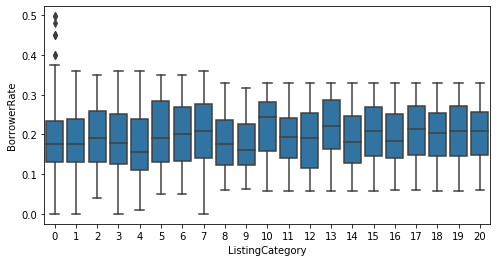

In [66]:
# plot boxplot

plt.figure(figsize=[8, 4])
sb.boxplot(data=loans_clean, x='ListingCategory', 
               y='BorrowerRate', color=base_color);

#### IsBorrowerHomeOwner versus BorrowerRate

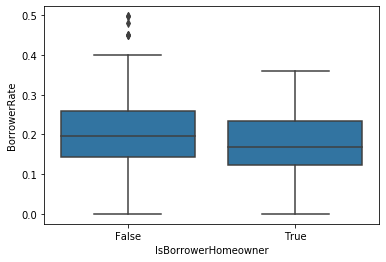

In [67]:
# plot boxplot

sb.boxplot(data = loans_clean, x = 'IsBorrowerHomeowner', y = 'BorrowerRate', 
           color = base_color);

plt.xlabel = 'IsBorrowerHomeOwner'
plt.ylabel = 'BorrowerRate'

#### IncomeVerifiable versus BorrowerRate

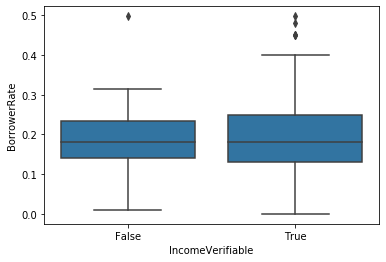

In [68]:
# plot boxplot

sb.boxplot(data = loans_clean, x = 'IncomeVerifiable', y = 'BorrowerRate', 
            color = base_color);

plt.xlabel = 'IncomeVerifiable'
plt.ylabel = 'BorrowerRate'

There are 2 groups represented in the boxplot above - group 1 can verify their income while group2 cannot verify their income. We can see the boxplot above, the median borrower rate is higher for the group 1 than group 2.

Interstingly, the pattern we see here contradicts the conventional wisdom: A borrower who can verify their income has a lower risk premium. However, the range in borrower rate for the group who can verify their income is much higher compared to the group who can't verify their income.

#### LoanOriginationDate versus BorrowerRate

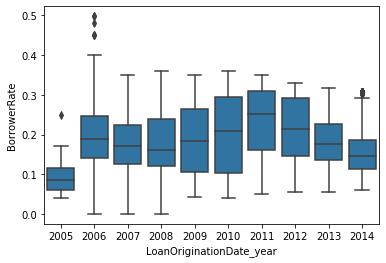

In [71]:
# plot scatterplot

sb.boxplot(data=loans_clean, x='LoanOriginationDate_year', 
            y='BorrowerRate', color=base_color);

plt.xlabel = 'LoanOriginationDate_year'
plt.ylabel = 'BorrowerRate'

This boxplot shows that the year of the loan issuance has a massive influence on the borrower rate. From 2005 to 2006 the borrower rate median jumped from around 0.1 to approximately 0.2. During this time the Federal Reserve was increasing the Federal Funds Rate. Hence, it seems that the median borrower rate in the dataset directly reacted to the monetary policy of the Federal Reserve. In the next two years (2007 & 2008), the median borrower rate fell gradually to about 0.18. The Federal Reserve started to cut the Federal Funds Rate in 2007 (starting with 4.75 %) and reaching 0.25 % at the end of 2008. Compared to these cuts of the Federal Reserve Rates, the median borrower rate in the dataset just fell slightly. In the following three years (2009, 2010 & 2011) the median borrower rate gradually rose to about 0.25, even though the Federal Funds Rate stayed at 0.25 % during these years. It seems that during these hard economic times the loan market was very tight and the borrowers had to pay an extra premium risk. After this, in the following three years (2012, 2013 & 2014) the median borrower rate fell steadily to around 0.17. Hence, in this period you could finally start to see the effect of the monetary policy on the median borrower rate.

### 3.2 Continuous Variables vs. "BorrowerRate"

Next, we look at the continuous variables. And the following variables fall in this category:

- StatedMonthlyIncome
- LoanOriginalAmount
- DebtToIncomeRatio

#### StatedMonthlyIncome versus BorrowerRate

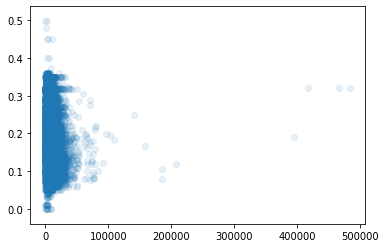

In [72]:
# create scatter plot
plt.scatter(data=loans_clean, 
            x=loans_clean['StatedMonthlyIncome'],
            y='BorrowerRate', alpha=1/10)

plt.xlabel = ('StatedMonthlyIncome [USD]')
plt.ylabel = ('BorrowerRate');

In this scatter plot, no correlation is visible between the variables: StatedMonthlyIncome & BorrowerRate. The dots in the scatterplot almost show a half-rhombus near the 0 mark with a width of 20,000. The half-rhombus starts at the borrower rate of 0 and ends at the borrower rate of 0.35. However, there are some outliers due to borrowers with high monthly income and due to loans with high borrower rate. These outliers are known from the univariate exploration of the variables: StatedMonthlyIncome & BorrowerRate. To focus on the bulk of the data, the same x-axis limitation, which was used during the univariate exploration, is used in the following (limit the stated monthly income to \$ 20,000).

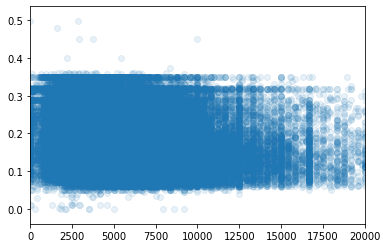

In [73]:
# scatterplot with focus on the bulk of data

plt.scatter(data=loans_clean, 
            x=loans_clean['StatedMonthlyIncome'],
            y='BorrowerRate', alpha=1/10)

plt.xlim(0, 20000)

plt.xlabel = ('StatedMonthlyIncome [USD]')
plt.ylabel = ('BorrowerRate');

Limiting StatedMonthlyIncome to $ 20,000, there is still no correlation visible between the two variables. This result is a surprise as usually there is the following conventional wisdom: the higher the monthly income, the lower the borrower rate. Instead of observing a clear correlation, you can see more of a rectangle. The first verticle line is near the stated monthly income of 0, and the second verticle line is near 20,000. The first horizontal line of the rectangle is near the borrower rate of 0.35, and the second horizontal line is near 0.05. However, there are some dots which are below and above the rectangle. It seems that for most lenders the borrower rates of 0.05 and 0.35 are functioning as some kind of threshold. The density of the dots is lower in the following area: high stated monthly income and high borrower rate. It means that there are fewer loans which were issued under these circumstances. It seems that the loan market spares high-income borrowers with a high borrower rate.

#### LoanOriginalAmount versus BorrowerRate

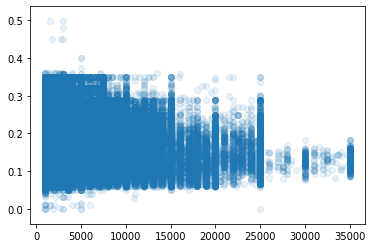

In [74]:
# plot scatter plot
plt.scatter(data=loans_clean, 
            x=loans_clean['LoanOriginalAmount'],
            y='BorrowerRate', alpha=1/10)

plt.xlabel = ('LoanOriginalAmount [USD]')
plt.ylabel = ('BorrowerRate');


In this scatter plot, there is no correlation visible between the variables: LoanOriginalAmount & BorrowerRate. However, there is an interesting observation in this scatterplot: The dots in the scatter plot form some kind of skew funnel. First, the higher the loan amount, the narrower the funnel. Second, the higher the loan amount, the lower the borrower rate. In the skew funnel, the following part is not covered by dots: high loan amounts (\$ 25,000 to 35,000) with high borrowing rates (0.2 to 0.35). It seems that big loans with high borrowing rates are not sustainable due to high-interest payments.

#### DebtToIncomeRatio versus BorrowerRate

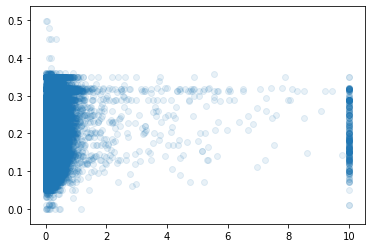

In [75]:
# plot scatter plot
plt.scatter(data=loans_clean, 
            x=loans_clean['DebtToIncomeRatio'],
            y='BorrowerRate', alpha=1/10)

plt.xlabel = ('DebtToIncomeRatio')
plt.ylabel = ('BorrowerRate');

In this scatter plot, there is no correlation visible between the variables: DebtToIncomeRatio & BorrowerRate. However, the scatter plot shows some kind of half-oval. The symmetry axis of the half-oval is the y-axis of the scatter plot. The width of the half-oval is approximately 1 unit of the debt to income ratio, and the height is about 0.3 units of borrower rate.

However, there are some outliers which are not part of the half-oval. These outliers are mainly dots with a high debt to income ratio. In the following, the scatterplot is focused on the half-oval, whereby using the same x-axis limitation for the debt to income ratio as used in the univariate exploration (limit the debt to income ratio to 1).

### 3.3 Discreet Variables vs. "BorrowerRate"

Finally, we compare the discreet variables with 'BorrowerRate'. And the following variables fall in this category:

- Term
- Recommendations

#### Term versus BorrowerRate

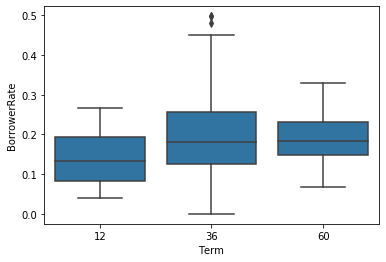

In [76]:
# plot boxplot

sb.boxplot(data = loans_clean, x = 'Term', y = 'BorrowerRate', 
            color = base_color)

plt.xlabel ='Term'
plt.ylabel = 'BorrowerRate'

The above boxplot shows that median BorrowerRate tends to increase with the loan Term (that is, the length of the loan). This is in line with our the conventional wisom which suggests that the greater the length of the issues loan, the higher the borrow rate.

#### Recommendation versus BorrowerRate

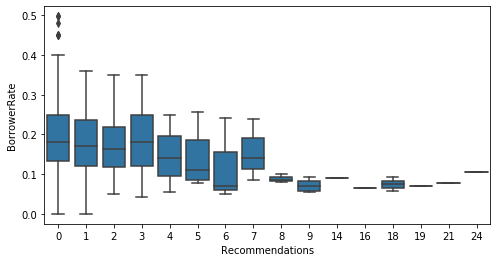

In [77]:
# plot boxplot
plt.figure(figsize=[8, 4])
sb.boxplot(data=loans_clean, x='Recommendations', 
            y='BorrowerRate', color=base_color)

plt.xlabel = 'Recommendations'
plt.ylabel = 'BorrowerRate'

The conventional wisdom here would be that: the more recommendation a borrower has, the lower the borrower rate would be. The boxplots above support this notion as we see a decrease in the median BorrowerRate as the number of recommendations increases. This means that borrowers with lesser recommendations tend to get a higher rate. We can see our results compare favourably with conventional wisdom.

<a id='Multivariate'></a>

## 4.0 Mulivariate Exploration

In this part of our analysis, we conduct a Multivariate Exploration of our data - where we compare more than two variables in the same plot to observe any relationships that exists between them.

We'll observe the follwoing comparisons:

- StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate (Color Coded)
- LoanOriginalAmount vs. BorrowerRate & LoanOriginationDate (Color Coded)
- StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate (Color Coded)
- LoanOriginationDate, BorrowerRate & Clustured by IsBorrowerHomeowner


[Back to Table of Contents](#contents_table)


#### StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate (Color Coded)

The scatterplot: StatedMonthlyIncome vs. BorrowerRate was already conducted during the Bivariate Exploration in the previous section. However, as known from the Bivariate Exploration, the year of the loan has a significant influence on the borrower rate. Hence, the scatterplot is extended by the variable LoanOriginationDate (years are treated as a categorical variable).


Similar to the Bivariate Exploration, the following scatterplot is focused on the bulk of the data (StatedMonthlyIncome between $ 0 and 20,000). Plus, a sample of the size 500 is used to reduce the overplotting and improve the readability of the plot.

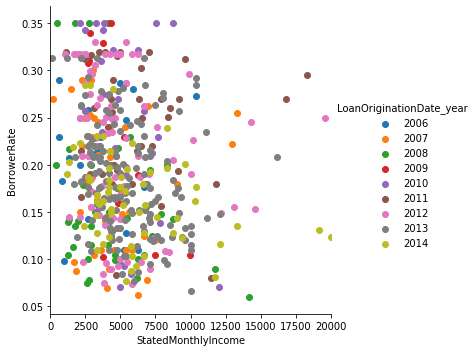

In [78]:
# create DataFrame with a sample size of 500
samples = np.random.choice(loans_clean.shape[0], 500, replace=False)
loan_samples = loans_clean.loc[samples,:]

# plot with the sample DataFrame
g = sb.FacetGrid(data = loan_samples, 
                  hue = 'LoanOriginationDate_year', height = 5)

g.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerRate')

plt.xlim(0, 20000)
plt.xlabel = ('StatedMonthlyIncome [$]')
g.add_legend();

An interesting outcome of this plot is that the points of the year 2014 tend to stay in the lower half of the scatterplot (BorrowerRate between 0 and 0.20). This behavior could be seen as well during the Bivariate Exploration of the two variables: BorrowerRate & LoanOriginationDate in the previous section.

### 4.1 LoanOriginalAmount vs. BorrowerRate & LoanOriginationDate via Color Encoding


The scatterplot: LoanOriginalAmount vs. BorrowerRate was as well conducted during the Bivariate Exploration in the previous section. Hence, like in the above multivariate plot (StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate via Color Encoding), the scatterplot is as well extended by the variable LoanOriginationDate (years are treated as a categorical variable). Moreover, a sample of the size 500 is used to reduce the overplotting and improve the readability of the plot.

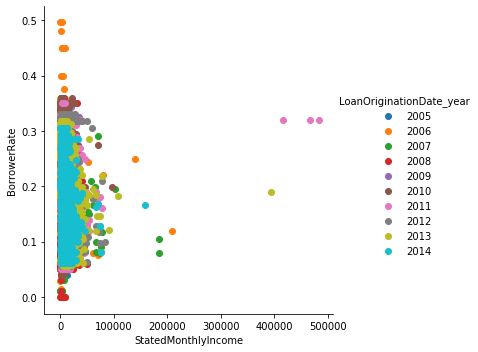

In [79]:
# plot scatterplot with color encoding

g = sb.FacetGrid(data = loans_clean, 
                  hue = 'LoanOriginationDate_year', height = 5)

g.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerRate')

plt.xlabel = ('StatedMonthlyIncome [$]')
g.add_legend();

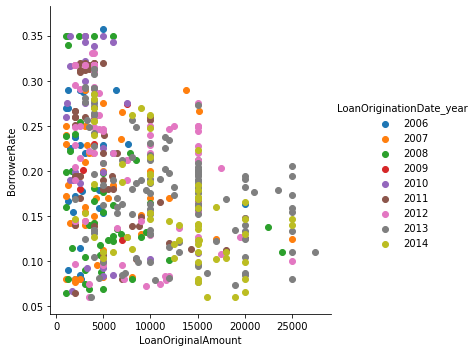

In [80]:
# create DataFrame with a sample size of 500
samples = np.random.choice(loans_clean.shape[0], 500, replace=False)
loan_samples = loans_clean.loc[samples,:]

# plot with the sample DataFrame
g = sb.FacetGrid(data = loan_samples, 
                  hue = 'LoanOriginationDate_year', height = 5)

g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate')

plt.xlabel = ('LoanOriginalAmount [$]')
g.add_legend();


Unlike the previous multivariate plot (StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate via Color Encoding), this multivariate plot shows no clear tendency among the color encoded dots.

### 4.2 StatedMonthlyIncome vs. BorrowerRate and LoanOriginationDate via Color Encoding

StatedMonthlyIncome vs. BorrowerRate as a scatterplot was as well created during the previous Bivariate Analysis. Thus, like in the above multivariate plot (StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate via Color Encoding), the scatterplot is as well extended by the variable LoanOriginationDate (years are treated as a categorical variable). Plus, a sample of the size 500 is used again to reduce the overplotting and improve the readability of the plot. Moreover, the scatterplot is focused on the bulk of the data (DebtToIncomeRatio between 0 and 1).

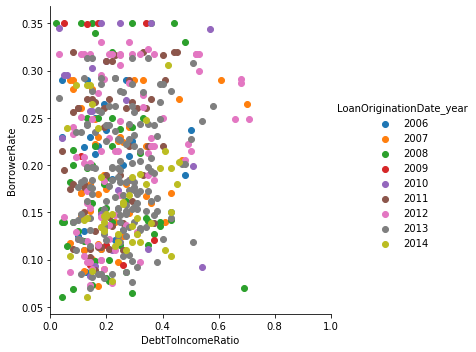

In [81]:
samples = np.random.choice(loans_clean.shape[0], 500, replace=False)
loan_samples = loans_clean.loc[samples,:]

# plot with the sample DataFrame
g = sb.FacetGrid(data=loan_samples, 
                  hue='LoanOriginationDate_year', height=5)

g.map(plt.scatter, 'DebtToIncomeRatio', 'BorrowerRate')

plt.xlim(0, 1)
g.add_legend();


Like in the previous multivariate plot (StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate via Color Encoding), the points of the year 2014 tend to stay in the lower half of the scatterplot in the above multivariate plot (BorrowerRate between 0 and 0.20). This behavior could be seen as well during the Bivariate Exploration of the two variables: BorrowerRate & LoanOriginationDate in the previous section.

### 4.3 BorrowerRate by LoanOriginationDate & IsBorrowerHomeowner

The Bivariate Exploration made it clear that both LoanOriginationDate and IsBorrowerHomeowner influence the BorrowerRate. Hence, in this section, a clustered boxplot is created to show the influence of both variables.

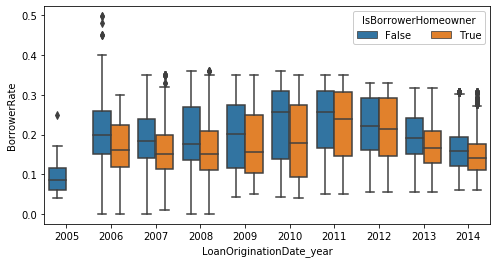

In [82]:
# plot clustered boxplot

plt.figure(figsize=[8, 4])
ax = sb.boxplot(data=loans_clean, x='LoanOriginationDate_year',
                 y='BorrowerRate', hue='IsBorrowerHomeowner')
ax.legend(loc=1, ncol=3, framealpha=1, title='IsBorrowerHomeowner');

The boxplot shows that in every year the median borrower rate of homeowners was lower compared to non-homeowners. In some years like 2009 and 2010 the median borrower rate of homeowners was significantly lower (approximately 0.05) compared to non-homeowners. However, in other years like 2012, the median borrower rate of homeowners was just slightly smaller compared to non-homeowners. It may have to do with the tight loan market during the Great Recession as in this time a home was used as collateral to reduced the risk premium.

### 4.4 Discussion 

#### 4.4.1 Insight - Relationships Observed and Features of Interest
2 of our 4 multivariate plots (StatedMonthlyIncome vs. BorrowerRate & LoanOriginationDate via Color Encoding + StatedMonthlyIncome vs. BorrowerRate and LoanOriginationDate via Color Encoding) confirmed that the year of the loan has a significant influence on the borrower rate. 

However, considering that a sample was used for this plot, more investigation needs to be done. Additionally, the clustured boxplot (BorrowerRate by LoanOriginationDate & IsBorrowerHomeowner) showed that in some years homeownership has a significant influence on the borrower rate, in other years however the homeownership has only a slight influence.

#### 4.4.2 Insight  - Unprecedented Findings
The multivariate plot: LoanOriginalAmount vs. BorrowerRate & LoanOriginationDate via Color Encoding, however, showed no apparent influence of the loan year. The small sample size is maybe the reason. his should be investigated further.